## Ejemplo 7: Gráficas de barras apiladas

### 1. Objetivos:
    - Aprender a generar e interpretar gráficas de barras apiladas
 
---
    
### 2. Desarrollo:

In [1]:
#%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../Datasets/athlete_olympic_events-cleann.csv', index_col=0)

df.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
120585,Nadiya Volodymyrivna Tkachenko (-Sapronova),F,23,165,74.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Athletics,Athletics Women's Pentathlon,None
124576,"Cornelia Maria ""Cocki"" van Engelsdorp Gastelaa...",F,22,170,67.0,Netherlands,NED,1960 Summer,1960,Summer,Roma,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,None
88962,"Gunhild Margareta ""Gun"" Olsson (-Eriksson)",F,26,166,57.0,Sweden,SWE,1972 Summer,1972,Summer,Munich,Athletics,Athletics Women's 4 x 100 metres Relay,None
82254,Jason Newth Morris,M,25,178,80.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Judo,Judo Men's Half-Middleweight,Silver
106442,Carlos A. Scanavino Villavicenio,M,24,187,80.0,Uruguay,URU,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Men's 200 metres Freestyle,None


Por ejemplo, digamos que queremos graficar la frecuencia de los 4 deportes que analizamos anteriormente. Queremos ver cuántas veces aparece cada uno en nuestro dataset para compararlos.

In [3]:
df_grouped = df.groupby('name')[['sex', 'sport']].max()

In [4]:
# Sólo nos quedamos 4 deportes: 'Basketball', 'Volleyball', 'Football', 'Baseball'

df_ball = df_grouped[df_grouped['sport'].isin(['Basketball', 'Volleyball', 'Football', 'Baseball'])]

In [5]:
df_ball.head()

,sex,sport
name,,
A Dijiang,M,Basketball
Aafke Hament,F,Volleyball
Aarn Galindo Rubio,M,Football
Aaron Duane Olson,M,Basketball
Aaron James Scott,M,Football


In [6]:
#Obtengamos la frecuencia de cada deporte

value_counts_all = df_ball['sport'].value_counts()

value_counts_all

Football      3355
Basketball    2257
Volleyball    2036
Baseball       590
Name: sport, dtype: int64

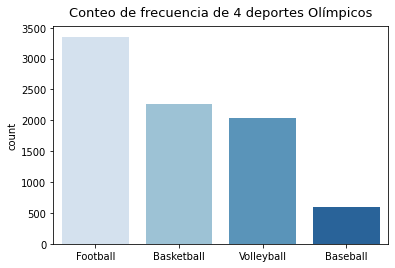

In [7]:
#gráfica de barras normalita... La hacíamos con barplot

fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(x= value_counts_all.index, y= value_counts_all, ax=ax, palette='Blues');

ax.set_ylabel('count')
ax.set_title('Conteo de frecuencia de 4 deportes Olímpicos', fontsize=13, pad=10);

¡Listo! Pero qué pasa si ahora además queremos segmentar nuestros conteos utilizando la variable 'sex'. Esto nos servirá para saber cómo es que cada género contribuye al conteo total de atletas.

In [11]:
# Definamos una variable auxiliar de contro

df_grouped['count'] = 1

df_grouped.head()

,sex,sport,count
name,,,
A Dijiang,M,Basketball,1
"A. J. Tyronne Benildus ""Benny"" Fernando",M,Athletics,1
"A. Joshua ""Josh"" West",M,Rowing,1
"A. W. Nancy ""Nan"" Rae",F,Swimming,1
Aadolf Fredrik Svanstrm,M,Athletics,1


In [20]:
# Agrupamos con respecto al deporte y nos quedamos sólo con 'Basketball', 'Volleyball', 'Football', 'Baseball'

df_ball_with_count = df_grouped[df_grouped['sport'].isin(['Basketball', 'Volleyball', 'Football', 'Baseball'])]

In [21]:
df_ball_with_count

,sex,sport,count
name,,,
A Dijiang,M,Basketball,1
Aafke Hament,F,Volleyball,1
Aarn Galindo Rubio,M,Football,1
Aaron Duane Olson,M,Basketball,1
Aaron James Scott,M,Football,1
...,...,...,...
va Biszku,F,Volleyball,1
va Gulys (-Beloberk),F,Basketball,1
va Sebk-Szalay,F,Volleyball,1


In [22]:
#Obtengamos un conteo por género y disciplina

value_counts = df_ball_with_count.groupby(['sport', 'sex'])['count'].sum()

value_counts

sport       sex
Baseball    M       590
Basketball  F       750
            M      1507
Football    F       614
            M      2741
Volleyball  F       936
            M      1100
Name: count, dtype: int64

In [23]:
# Vamos a convertir el arreglo en dataframe y la variable genéro la vamos a convertir
# en columnas... esto se hace con la función unstack.... esta operación se conoce como
# pivotear, convertir un df de largo a ancho, gather/spread...

value_counts = value_counts.unstack(1)

value_counts

sex,F,M
sport,,
Baseball,NaN,590.0
Basketball,750.0,1507.0
Football,614.0,2741.0
Volleyball,936.0,1100.0


In [25]:
# Convertimos los NAs en 0s
value_counts = value_counts.fillna(0)

In [26]:
value_counts

sex,F,M
sport,,
Baseball,0.0,590.0
Basketball,750.0,1507.0
Football,614.0,2741.0
Volleyball,936.0,1100.0


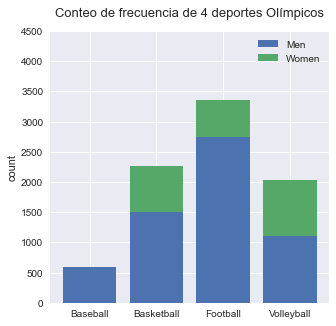

In [29]:
plt.style.use('seaborn')

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot() # primero defino unos ejes o canvas que tendrán en común

# La función que nos permite construir las gráficas apiladas es bar

plt1 = ax.bar(value_counts.index, value_counts['M'], label='M')
plt2 = ax.bar(value_counts.index, value_counts['F'], bottom=value_counts['M'])
# esta instrucción es muy importante para que los apile

ax.set_ylabel('count') # definimos que esta es la variable y eje de conteo

ax.set_title('Conteo de frecuencia de 4 deportes Olímpicos', fontsize=13, pad=15);
plt.legend((plt1[0], plt2[0]), ('Men', 'Women'));
ax.set_ylim(0, 4500);

Con esta gráfica se vuelve muy evidente la disparidad que existe en casi todos estos deportes. Excepto por volleyball, donde la participación de hombres y mujeres es similar, en los demás deportes la participación es femenina es mucho menor o incluso nula.